In [ ]:
import sys
sys.path.extend(["../..", ".."])
from paths import FIG_DIR
from cr2_helper_func import get_state_purity, plot_state_purity, get_var_ranks

import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import scanpy as sc
import cellrank as cr

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cr.settings.verbosity = 2
cr.settings.figdir = str(FIG_DIR)

In [3]:
save_fig = True

In [4]:
adata = sc.read('adata_gv.h5ad')
adata

AnnData object with n_obs × n_vars = 6431 × 962
    obs: 'celltype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'mean', 'std', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes', 'avg_prog_confidence', 'avg_mature_confidence'
    uns: 'WNN', 'celltype_colors', 'gene_wise_confidence', 'gv_params', 'neighbors', 'pca', 're

In [5]:
palette = {'TAC-1': '#a76b9a',
 'IRS': '#da96ff',
 'Medulla': '#ad94ec',
 'TAC-2': '#2f3ea8',
 'Hair Shaft-cuticle.cortex': '#d70000'}

In [6]:
terminal_states = ['IRS', 'Medulla', 'Hair Shaft-cuticle.cortex']

In [7]:
gvk = cr.kernels.VelocityKernel(adata, xkey='Ms', vkey='velocity_gv', conn_key='WNN')
gvkc = cr.kernels.VelocityKernel(adata, xkey='Mc', vkey='velocity_c', conn_key='WNN')

In [8]:
for k in [gvk, gvkc]:
    k.compute_transition_matrix()

Computing transition matrix using `'deterministic'` model


  0%|          | 0/6431 [00:00<?, ?cell/s]

Using `softmax_scale=1.7579`


  0%|          | 0/6431 [00:00<?, ?cell/s]

    Finish (0:00:06)
Computing transition matrix using `'deterministic'` model


  0%|          | 0/6431 [00:00<?, ?cell/s]

Using `softmax_scale=5.2511`


  0%|          | 0/6431 [00:00<?, ?cell/s]

    Finish (0:00:03)


In [9]:
from cellrank.estimators import GPCCA
g_gv = GPCCA(gvk)
g_gvc = GPCCA(gvkc)
for g in [g_gv, g_gvc]:
    g.fit(cluster_key='celltype')
    g.predict_terminal_states()

Computing eigendecomposition of the transition matrix
Adding `adata.uns['eigendecomposition_fwd']`
       `.eigendecomposition`
    Finish (0:00:00)
Computing Schur decomposition
Adding `adata.uns['eigendecomposition_fwd']`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)
Computing `3` macrostates
Adding `.macrostates`
       `.macrostates_memberships`
       `.coarse_T`
       `.coarse_initial_distribution
       `.coarse_stationary_distribution`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)
Adding `adata.obs['term_states_fwd']`
       `adata.obs['term_states_fwd_probs']`
       `.terminal_states`
       `.terminal_states_probabilities`
       `.terminal_states_memberships
    Finish`
Computing eigendecomposition of the transition matrix
Adding `adata.uns['eigendecomposition_fwd']`
       `.eigendecomposition`
    Finish (0:00:00)
Computing Schur decomposition
Adding `adata.uns['eigendec

/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/scvelo/plotting/scatter.py:694: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/scvelo/plotting/utils.py:1396: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=bg_size, marker=".", c=bg_color, zorder=zord - 2, **kwargs)
/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/scvelo/plotting/utils.py:1397: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=gp_size, marker=".", c=gp_color, zorder=zord - 1, **kwargs)


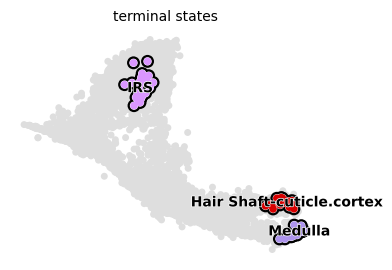

In [10]:
g_gv.plot_macrostates(which="terminal", legend_loc="on data", size=100, figsize=(4,3))

/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/scvelo/plotting/scatter.py:694: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/scvelo/plotting/utils.py:1396: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=bg_size, marker=".", c=bg_color, zorder=zord - 2, **kwargs)
/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/scvelo/plotting/utils.py:1397: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=gp_size, marker=".", c=gp_color, zorder=zord - 1, **kwargs)


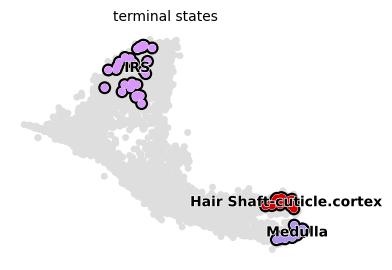

In [11]:
g_gvc.plot_macrostates(which="terminal", legend_loc="on data", size=100, figsize=(4,3))

Mean purity: 0.888888888888889


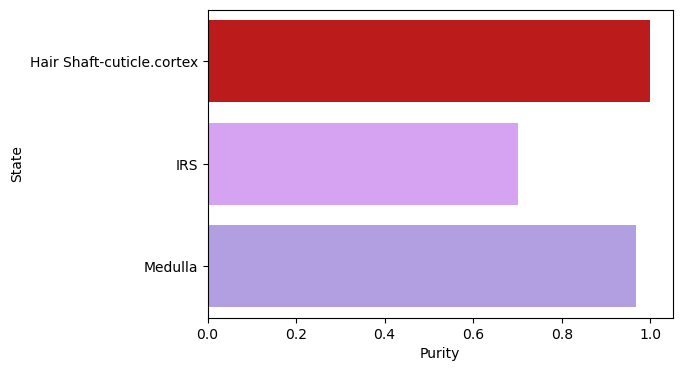

In [12]:
macrostate_purity = get_state_purity(adata, g_gv, states="macrostates", obs_col="celltype")
print(f"Mean purity: {np.mean(list(macrostate_purity.values()))}")
palette = dict(zip(g_gv.macrostates.cat.categories, g_gv._macrostates.colors))
order = g_gv.macrostates.cat.categories.sort_values().to_list()
plot_state_purity(macrostate_purity, palette=palette, order=order)

Mean purity: 0.8333333333333333


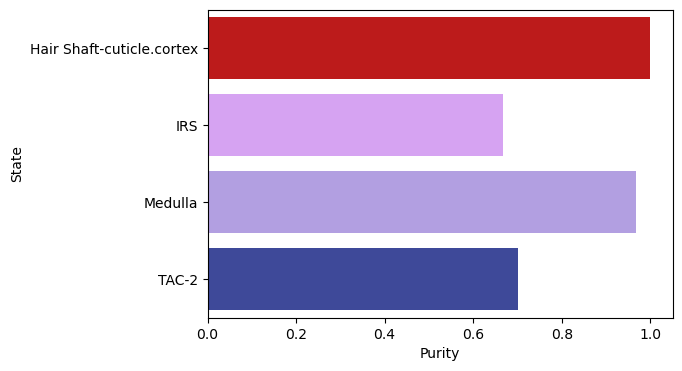

In [13]:
macrostate_purity = get_state_purity(adata, g_gvc, states="macrostates", obs_col="celltype")
print(f"Mean purity: {np.mean(list(macrostate_purity.values()))}")
palette = dict(zip(g_gvc.macrostates.cat.categories, g_gvc._macrostates.colors))
order = g_gvc.macrostates.cat.categories.sort_values().to_list()
plot_state_purity(macrostate_purity, palette=palette, order=order)

In [65]:
vk_mo = 0.8*gvk + 0.2*gvkc
g_fwd = cr.estimators.GPCCA(vk_mo)
print(g_fwd)

GPCCA[kernel=(0.8 * VelocityKernel[n=6431] + 0.2 * VelocityKernel[n=6431]), initial_states=None, terminal_states=None]


Computing Schur decomposition
When computing macrostates, choose a number of states NOT in `[9, 14, 18, 20]`
Adding `adata.uns['eigendecomposition_fwd']`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)


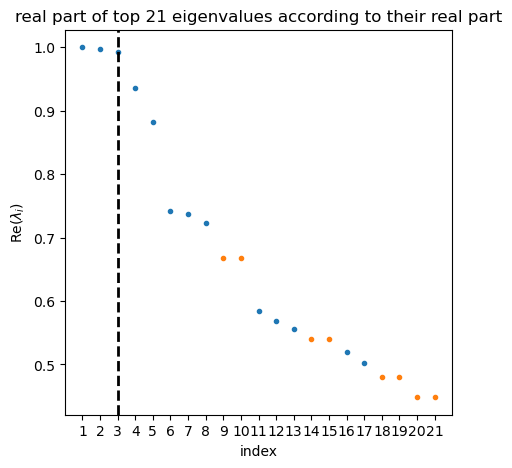

In [66]:
g_fwd.compute_schur()
g_fwd.plot_spectrum(real_only=True)

Computing `5` macrostates
Adding `.macrostates`
       `.macrostates_memberships`
       `.coarse_T`
       `.coarse_initial_distribution
       `.coarse_stationary_distribution`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)


/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/scvelo/plotting/scatter.py:694: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/scvelo/plotting/utils.py:1396: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=bg_size, marker=".", c=bg_color, zorder=zord - 2, **kwargs)
/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/scvelo/plotting/utils.py:1397: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=gp_size, marker=".", c=gp_color, zorder=zord - 1, **kwargs)


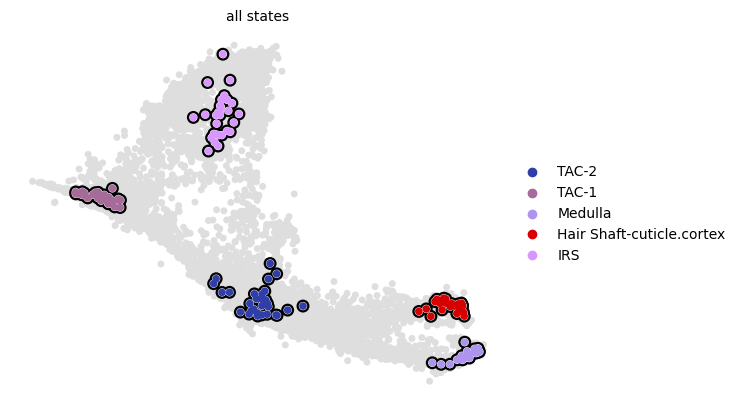

In [67]:
g_fwd.compute_macrostates(n_states=5, cluster_key='celltype')
g_fwd.plot_macrostates(which='all', discrete=True, size=100, legend_loc='right')

Adding `adata.obs['term_states_fwd']`
       `adata.obs['term_states_fwd_probs']`
       `.terminal_states`
       `.terminal_states_probabilities`
       `.terminal_states_memberships
    Finish`


/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/scvelo/plotting/scatter.py:694: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/scvelo/plotting/utils.py:1396: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=bg_size, marker=".", c=bg_color, zorder=zord - 2, **kwargs)
/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/scvelo/plotting/utils.py:1397: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=gp_size, marker=".", c=gp_color, zorder=zord - 1, **kwargs)


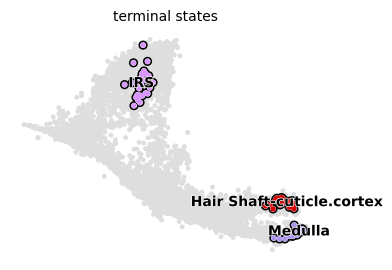

In [68]:
g_fwd.predict_terminal_states()
g_fwd.plot_macrostates(which="terminal", legend_loc="on data", size=50, figsize=(4,3))

In [69]:
g_fwd.set_terminal_states(states=["Hair Shaft-cuticle.cortex", "Medulla", "IRS"])

Adding `adata.obs['term_states_fwd']`
       `adata.obs['term_states_fwd_probs']`
       `.terminal_states`
       `.terminal_states_probabilities`
       `.terminal_states_memberships
    Finish`


GPCCA[kernel=(0.8 * VelocityKernel[n=6431] + 0.2 * VelocityKernel[n=6431]), initial_states=None, terminal_states=['Hair Shaft-cuticle.cortex', 'IRS', 'Medulla']]

Adding `adata.obs['init_states_fwd']`
       `adata.obs['init_states_fwd_probs']`
       `.initial_states`
       `.initial_states_probabilities`
       `.initial_states_memberships
    Finish`


/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/scvelo/plotting/scatter.py:694: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/scvelo/plotting/utils.py:1396: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=bg_size, marker=".", c=bg_color, zorder=zord - 2, **kwargs)
/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/scvelo/plotting/utils.py:1397: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=gp_size, marker=".", c=gp_color, zorder=zord - 1, **kwargs)


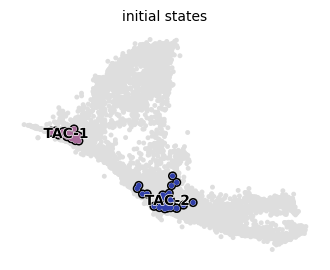

In [70]:
g_fwd.predict_initial_states(n_states=2)
g_fwd.plot_macrostates(which="initial", legend_loc="on data", size=50, figsize=(4,3))

In [71]:
g_fwd.compute_fate_probabilities()

Computing fate probabilities


  0%|          | 0/3 [00:00<?, ?/s]

Adding `adata.obsm['lineages_fwd']`
       `.fate_probabilities`
    Finish (0:00:00)


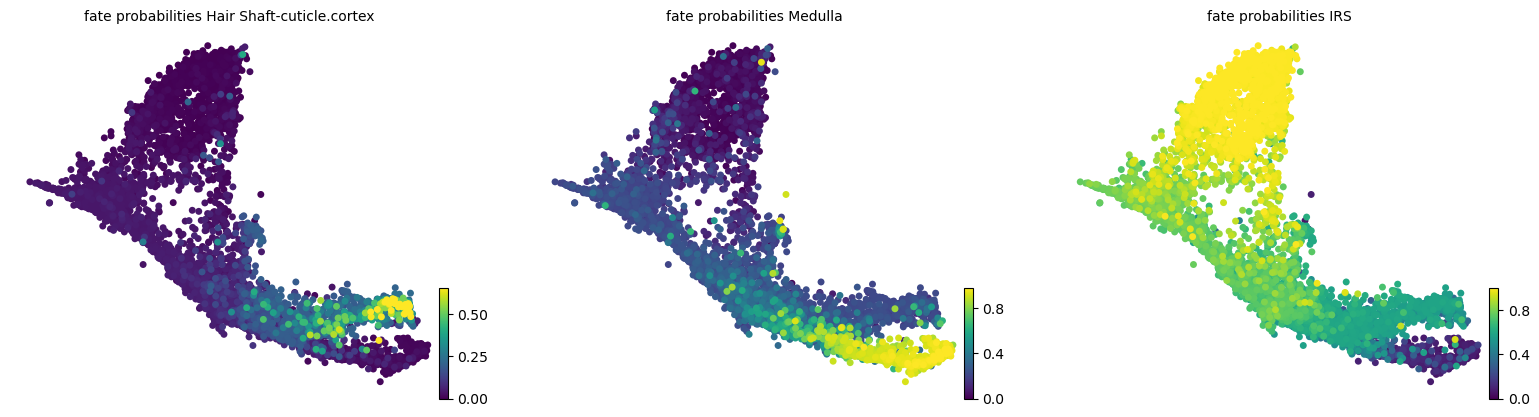

In [72]:
g_fwd.plot_fate_probabilities(same_plot=False, size=100, basis="umap")

In [79]:
adata.obs['CX_probability'] = adata.obsm['lineages_fwd']['Hair Shaft-cuticle.cortex'].X.flatten()
adata.obs['MD_probability'] = adata.obsm['lineages_fwd']['Medulla'].X.flatten()
adata.obs['IRS_probability'] = adata.obsm['lineages_fwd']['IRS'].X.flatten()

In [80]:
adata.write('adata_gv_cr.h5ad')

In [28]:
# Check collected from PMID: 32109378
IRS_markers = [i for i in adata.var_names if i in ['Krt71', 'Krt27', 'Prss53', 'Tchh', 'Krt73', 'Fbp1', 'Cryba4', 'Krt72']]
CX_markers = [i for i in adata.var_names if i in ['Selenbp1', 'Krt35', 'Rnaset2b', 'Dapl1', 'Hspb1', 'Tagln3', 'Krt36', 'Krt31', 'Krt32', 'Krt82']]
MED_markers = [i for i in adata.var_names if i in ['Aldh1a3', 'Rgcc', 'Csta1', 'Fabp4', 'Krt75', 'Kitl', 'Foxq1', 'Tnni1']]

In [29]:
gene_ranks = {terminal_state: pd.DataFrame() for terminal_state in terminal_states}

In [30]:
drivers = g_fwd.compute_lineage_drivers(
    cluster_key="celltype",
    lineages=terminal_states,
    clusters=["TAC-1", "TAC-2"],
    return_drivers=True,
)

for terminal_state in g_fwd.terminal_states.cat.categories:
    drivers = drivers.merge(
        pd.DataFrame(drivers.sort_values(by=f"{terminal_state}_corr", ascending=False).index)
        .reset_index()
        .rename(columns={"index": f"Corr. rank - {terminal_state}"})
        .set_index(0),
        left_index=True,
        right_index=True,
    )

Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:01)


In [31]:
_df = get_var_ranks(
    var_names=MED_markers, drivers=drivers, macrostate="Medulla", var_type="Marker", model="GraphVelo"
)
gene_ranks["Medulla"] = pd.concat([gene_ranks["Medulla"], _df])

Marker towards Medulla for GraphVelo in top 100: 2 (out of 3)


In [32]:
_df = get_var_ranks(
    var_names=CX_markers, drivers=drivers, macrostate="Hair Shaft-cuticle.cortex", var_type="Marker", model="GraphVelo"
)
gene_ranks["Hair Shaft-cuticle.cortex"] = pd.concat([gene_ranks["Hair Shaft-cuticle.cortex"], _df])

Marker towards Hair Shaft-cuticle.cortex for GraphVelo in top 100: 2 (out of 3)


In [33]:
_df = get_var_ranks(
    var_names=IRS_markers, drivers=drivers, macrostate="IRS", var_type="Marker", model="GraphVelo"
)
gene_ranks["IRS"] = pd.concat([gene_ranks["IRS"], _df])

Marker towards IRS for GraphVelo in top 100: 4 (out of 5)


In [34]:
for terminal_state in gene_ranks.keys():
    gene_ranks[terminal_state] = gene_ranks[terminal_state].sort_values(f"Corr. rank - {terminal_state}")
    gene_ranks[terminal_state].to_csv(f"gene_ranks_{terminal_state}-gv.csv")

In [61]:
medulla_driver_clusters = ['Medulla', 'TAC-1', 'TAC-2']
medulla_df = g_fwd.compute_lineage_drivers(
    lineages=["Medulla"], cluster_key="celltype", clusters=medulla_driver_clusters
)
medulla_df.head(10)

Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:00)


,Medulla_corr,Medulla_pval,Medulla_qval,Medulla_ci_low,Medulla_ci_high
Krt33b,0.921072,0.000000e+00,0.000000e+00,0.916669,0.925252
Gpnmb,0.477308,1.301089e-283,6.258239e-281,0.455168,0.498858
Kitl,0.433998,1.778925e-227,5.704421e-225,0.410755,0.456677
Soat1,0.387419,2.148246e-176,5.166532e-174,0.363113,0.411198
Prdm1,0.326882,3.439267e-122,6.617150e-120,0.301383,0.351913
Aldh1a3,0.278156,3.587287e-87,5.751617e-85,0.251853,0.304049
Tchh,0.271479,6.490098e-83,8.919250e-81,0.245075,0.297479
Gli3,0.265060,6.122265e-79,7.362024e-77,0.238564,0.291163
Padi3,0.264772,9.177707e-79,9.809949e-77,0.238272,0.290879
Tgm6,0.253985,2.400681e-72,2.309455e-70,0.227333,0.280256


In [62]:
hs_driver_clusters = ['Hair Shaft-cuticle.cortex', 'TAC-1', 'TAC-2']
hs_df = g_fwd.compute_lineage_drivers(
    lineages=["Hair Shaft-cuticle.cortex"], cluster_key="celltype", clusters=hs_driver_clusters
)
hs_df.head(10)

Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:00)


,Hair Shaft-cuticle.cortex_corr,Hair Shaft-cuticle.cortex_pval,Hair Shaft-cuticle.cortex_qval,Hair Shaft-cuticle.cortex_ci_low,Hair Shaft-cuticle.cortex_ci_high
Vat1l,0.765530,0.000000e+00,0.000000e+00,0.753796,0.776777
Krt35,0.363048,5.556046e-159,2.672458e-156,0.338716,0.386896
Dsg4,0.272936,4.646631e-87,1.490020e-84,0.247062,0.298420
Hephl1,0.240277,4.087539e-67,9.830532e-65,0.213959,0.266246
Dapl1,0.213726,4.755116e-53,7.624036e-51,0.187091,0.240046
Krt31,0.186277,1.987561e-40,2.731477e-38,0.159356,0.212921
Unc5b,0.185819,3.110980e-40,3.740954e-38,0.158894,0.212468
Jag1,0.175420,5.901550e-36,5.677291e-34,0.148398,0.202181
Lef1,0.159972,4.377768e-30,2.807609e-28,0.132817,0.186886
Hoxc13,0.142257,4.711143e-24,2.832575e-22,0.114966,0.169333


In [63]:
# Check collected from PMID: 32109378
IRS_markers = [i for i in adata.var_names if i in ['Krt71', 'Krt27', 'Prss53', 'Tchh', 'Krt73', 'Fbp1', 'Cryba4', 'Krt72']]
CX_markers = [i for i in adata.var_names if i in ['Selenbp1', 'Krt35', 'Rnaset2b', 'Dapl1', 'Hspb1', 'Tagln3', 'Krt36', 'Krt31']]
MED_markers = [i for i in adata.var_names if i in ['Aldh1a3', 'Rgcc', 'Csta1', 'Fabp4', 'Krt75', 'Kitl', 'Foxq1', 'Tnni1']]
IRS_markers, CX_markers, MED_markers

(['Krt27', 'Krt71', 'Krt72', 'Krt73', 'Tchh'],
 ['Dapl1', 'Krt31', 'Krt35'],
 ['Aldh1a3', 'Kitl', 'Krt75'])

Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:00)
Adjusting text position
    Finish (0:00:01)


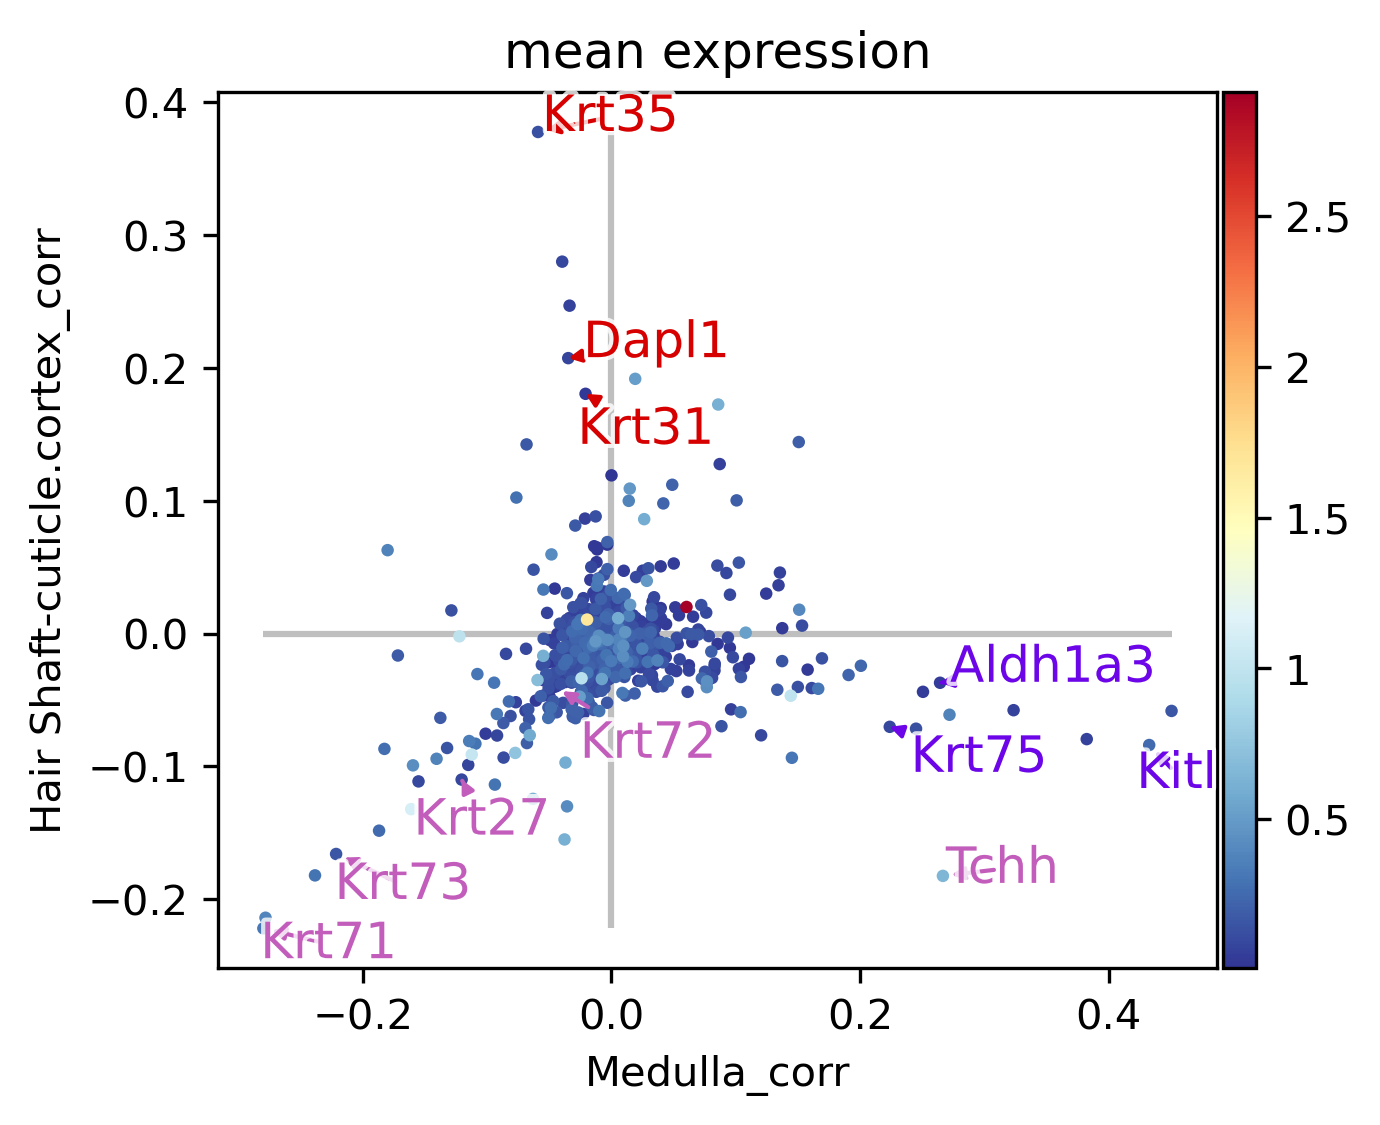

In [64]:
adata.var["mean expression"] = np.log1p((adata.layers['Ms']+adata.layers['Mu'])).mean(axis=0)
driver_df = g_fwd.compute_lineage_drivers()
genes_oi = {
    "Medulla": MED_markers,
    "Hair Shaft-cuticle.cortex": CX_markers,
    "IRS": IRS_markers
}

# visualize in a scatter plot
ax = g_fwd.plot_lineage_drivers_correlation(
    lineage_x="Medulla",
    lineage_y="Hair Shaft-cuticle.cortex",
    adjust_text=True,
    gene_sets=genes_oi,
    gene_sets_colors=['#6c05e8', "#d70000", "#c35dbb"],
    color="mean expression",
    legend_loc="none",
    figsize=(4.5, 4),
    dpi=300,
    fontsize=12,
    size=36,
    show=False)
# plt.savefig("./figures/lineage_marker_genes.pdf", dpi=300, transparent=True)